<span style="font-family: 'Arial'; font-size: 24px; font-weight: bold; background-color: yellow; color: black; padding: 5px;">House Price Prediciton using Linear Regression</span>




In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [3]:
df=pd.read_csv('house_price_regression_dataset.csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [4]:
df.head(2)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,262382.852274
1,4272,3,3,2016,4.753014,1,6,985260.854490


In [5]:
df['m2']=df['Square_Footage']*0.0929030
#converting square feet to metres square 

df=df.drop("Square_Footage",axis=1)
#drop square footage 

In [6]:
df.head()


,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,m2
0,2,1,1981,0.599637,0,5,2.623829e+05,126.348080
1,3,3,2016,4.753014,1,6,9.852609e+05,396.881616
2,1,2,2016,3.634823,0,9,7.779774e+05,333.707576
3,1,2,1977,2.730667,1,8,2.296989e+05,89.744298
4,2,1,1993,4.699073,0,8,1.041741e+06,457.640178


In [7]:
df.info

<bound method DataFrame.info of      Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  Garage_Size  \
0               2              1        1981  0.599637            0   
1               3              3        2016  4.753014            1   
2               1              2        2016  3.634823            0   
3               1              2        1977  2.730667            1   
4               2              1        1993  4.699073            0   
..            ...            ...         ...       ...          ...   
995             4              1        1978  2.165110            2   
996             1              2        1999  2.977123            1   
997             4              2        1962  4.055067            0   
998             5              2        1950  1.930921            0   
999             4              2        1983  3.108790            2   

     Neighborhood_Quality   House_Price          m2  
0                       5  2.623829e+05  126.348080  
1      

In [8]:
df.describe().T  #first describe and to make reading easy we transpose so we used here df.describe().T where T=transpose the matrix 

,count,mean,std,min,25%,50%,75%,max
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06
m2,1000.0,261.561150,116.641103,46.730209,162.533798,265.934838,357.630099,4.644221e+02


<Axes: >

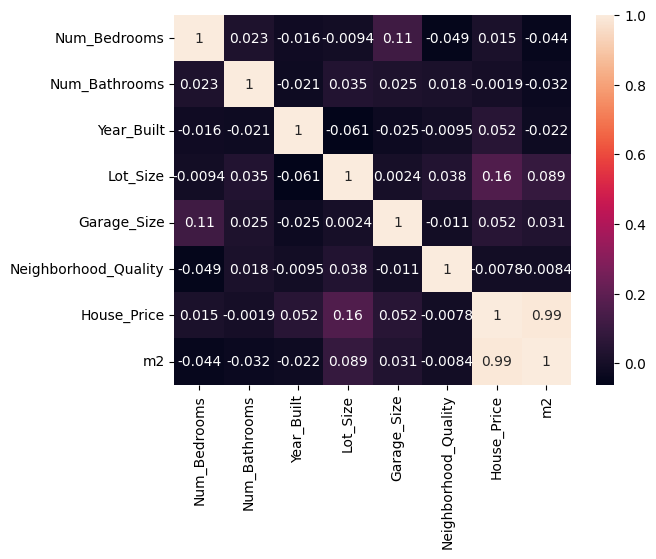

In [9]:
sns.heatmap(df.corr(),annot=True)

<span style="font-family: 'Arial'; font-size: 18px; font-weight: bold; background-color: #FFFFE0; color: black; padding: 3px;">The line sns.heatmap(df.corr(), annot=True) creates a heatmap to visualize the correlation matrix 
of the DataFrame df using the seaborn library.</span>

<span style="font-family: 'Arial'; font-size: 17px; font-weight: bold; background-color: #FFFFE0; color: black; padding: 3px;">A heatmap is a colorful chart that helps you see the relationships between different variables in your data. The colors represent how strongly related two variables are. "Annot=True" makes sure the actual numbers are shown inside the chart so you can know the exact relationship (correlation) between each pair of variables.  </span>


In [10]:
cats=df.loc[:,['Num_Bedrooms','Num_Bathrooms','Garage_Size']]

In [11]:
cats

,Num_Bedrooms,Num_Bathrooms,Garage_Size
0,2,1,0
1,3,3,1
2,1,2,0
3,1,2,1
4,2,1,0
...,...,...,...
995,4,1,2
996,1,2,1
997,4,2,0
998,5,2,0


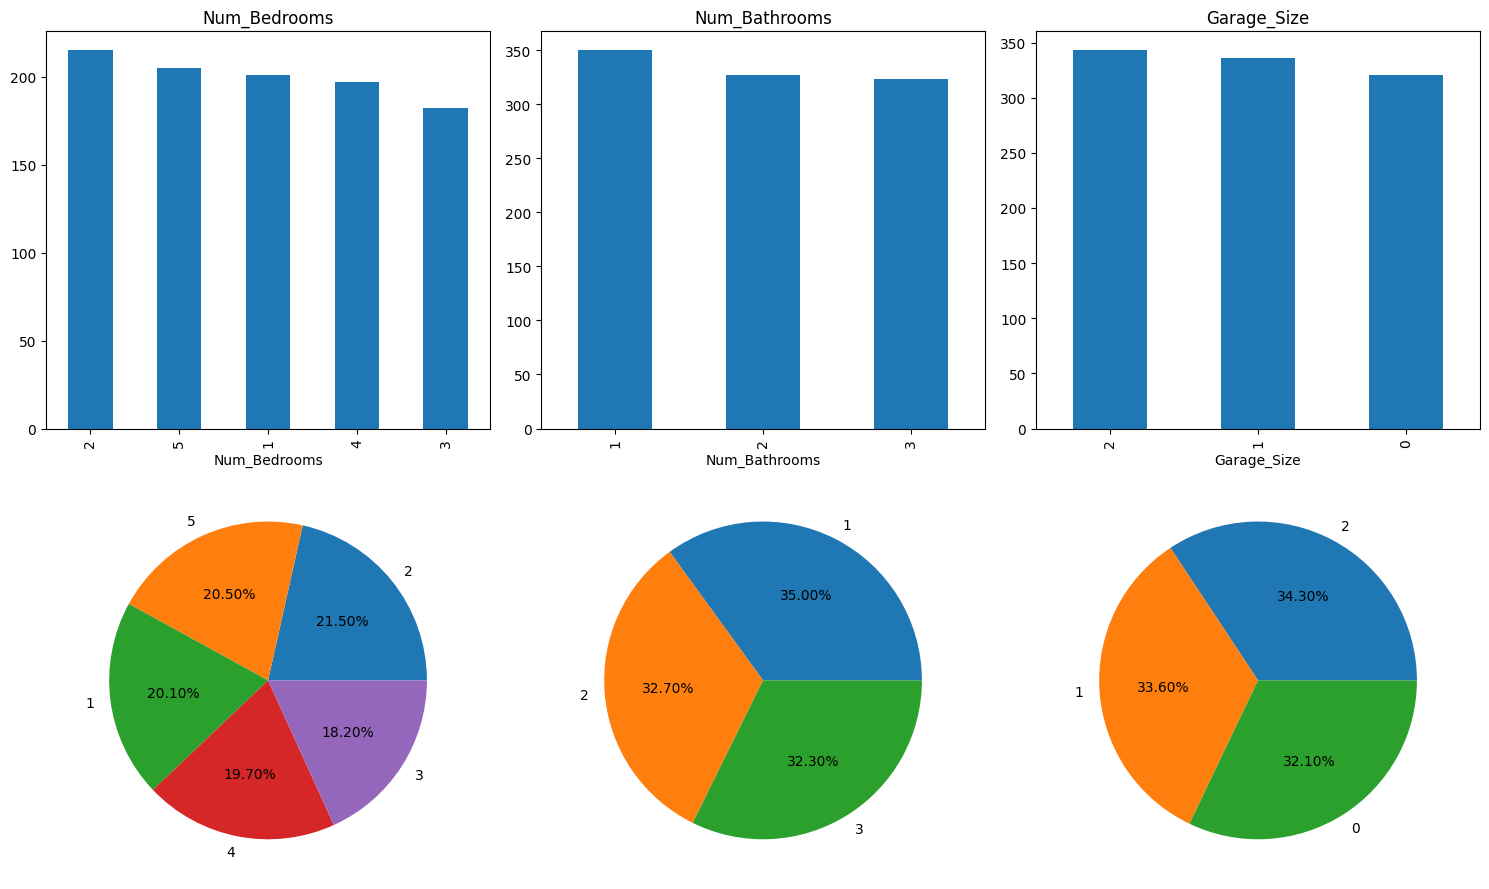

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

for i, j in enumerate(cats):
    index = 0
    count = df[j].value_counts()
    count.plot(kind="bar", ax=axes[index][i])
    axes[index][i].set_title(j)
    
    index += 1
    
    count.plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title("")
    
plt.tight_layout()
plt.show()

In [13]:
df.columns

Index(['Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size',
       'Garage_Size', 'Neighborhood_Quality', 'House_Price', 'm2'],
      dtype='object')

C:\Users\Nitro\AppData\Local\Temp\ipykernel_18232\1158627444.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


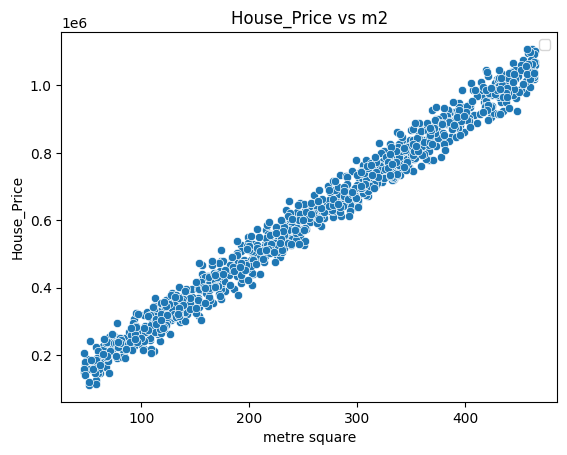

In [14]:
sns.scatterplot(x='m2',y='House_Price',data=df)
plt.xlabel('metre square')
plt.ylabel('House_Price')
plt.title('House_Price vs m2')
plt.legend()
plt.show()



  <span style="font-family: 'Arial'; font-size: 16px; font-weight: bold; background-color: #FFFFE0; color: black; padding: 3px;">Check Null Values</span>
  

In [19]:
df.isna().sum() #.sum() gives missing number of values in each column 

Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
m2                      0
dtype: int64

In [20]:
df.isna() # just checking for null values 

,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,m2
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


<Axes: xlabel='m2'>

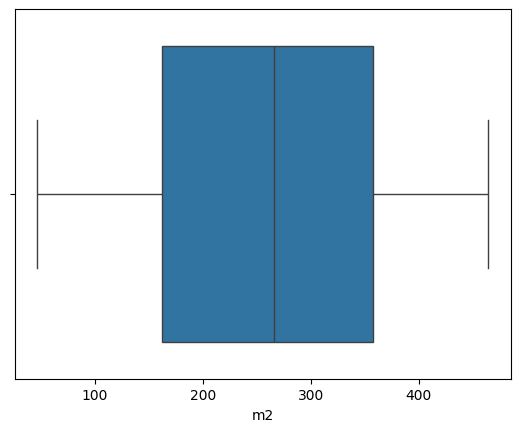

In [21]:
sns.boxplot(df,x='m2')

Boxplot is standarized way of displaying data in five-number summary. minimum ,Q1,Q3,mdn .... 

  <span style="font-family: 'Arial'; font-size: 16px; font-weight: bold; background-color: #FFFFE0; color: black; padding: 3px;">x='m2': Specifies the variable m2 on the x-axis. Since no y variable is provided, the boxplot shows the distribution of the m2 column.</span>

In [22]:
q1=df.quantile(.25)

In [23]:
q1

Num_Bedrooms                 2.000000
Num_Bathrooms                1.000000
Year_Built                1969.000000
Lot_Size                     1.665946
Garage_Size                  0.000000
Neighborhood_Quality         3.000000
House_Price             401648.228909
m2                         162.533798
Name: 0.25, dtype: float64

In [24]:
q3=df.quantile(.75)
IQR=q3-q1
LowerBound=q1-1.5*IQR 
UpperBound=q3+1.5*IQR


In [26]:
IQR

Num_Bedrooms                 2.000000
Num_Bathrooms                2.000000
Year_Built                  35.250000
Lot_Size                     2.257372
Garage_Size                  2.000000
Neighborhood_Quality         5.000000
House_Price             425493.048728
m2                         195.096300
dtype: float64

In [27]:
LowerBound

Num_Bedrooms                -1.000000
Num_Bathrooms               -2.000000
Year_Built                1916.125000
Lot_Size                    -1.720112
Garage_Size                 -3.000000
Neighborhood_Quality        -4.500000
House_Price            -236591.344182
m2                        -130.110652
dtype: float64

In [28]:
UpperBound

Num_Bedrooms            7.000000e+00
Num_Bathrooms           6.000000e+00
Year_Built              2.057125e+03
Lot_Size                7.309375e+00
Garage_Size             5.000000e+00
Neighborhood_Quality    1.550000e+01
House_Price             1.465381e+06
m2                      6.502745e+02
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num_Bedrooms          1000 non-null   int64  
 1   Num_Bathrooms         1000 non-null   int64  
 2   Year_Built            1000 non-null   int64  
 3   Lot_Size              1000 non-null   float64
 4   Garage_Size           1000 non-null   int64  
 5   Neighborhood_Quality  1000 non-null   int64  
 6   House_Price           1000 non-null   float64
 7   m2                    1000 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


  <span style="font-family: 'Arial'; font-size: 16px; font-weight: bold; background-color: #FFFFE0; color: black; padding: 3px;">Data Split</span>

In [31]:
X=df.drop(['House_Price'],axis=1)

In [33]:
X

,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,m2
0,2,1,1981,0.599637,0,5,126.348080
1,3,3,2016,4.753014,1,6,396.881616
2,1,2,2016,3.634823,0,9,333.707576
3,1,2,1977,2.730667,1,8,89.744298
4,2,1,1993,4.699073,0,8,457.640178
...,...,...,...,...,...,...,...
995,4,1,1978,2.165110,2,10,302.956683
996,1,2,1999,2.977123,1,10,295.338637
997,4,2,1962,4.055067,0,2,242.105218
998,5,2,1950,1.930921,0,7,438.780869


In [36]:
y=df['House_Price']

In [37]:
y

0      2.623829e+05
1      9.852609e+05
2      7.779774e+05
3      2.296989e+05
4      1.041741e+06
           ...     
995    7.014940e+05
996    6.837232e+05
997    5.720240e+05
998    9.648653e+05
999    7.425993e+05
Name: House_Price, Length: 1000, dtype: float64

In [38]:
df

,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,m2
0,2,1,1981,0.599637,0,5,2.623829e+05,126.348080
1,3,3,2016,4.753014,1,6,9.852609e+05,396.881616
2,1,2,2016,3.634823,0,9,7.779774e+05,333.707576
3,1,2,1977,2.730667,1,8,2.296989e+05,89.744298
4,2,1,1993,4.699073,0,8,1.041741e+06,457.640178
...,...,...,...,...,...,...,...,...
995,4,1,1978,2.165110,2,10,7.014940e+05,302.956683
996,1,2,1999,2.977123,1,10,6.837232e+05,295.338637
997,4,2,1962,4.055067,0,2,5.720240e+05,242.105218
998,5,2,1950,1.930921,0,7,9.648653e+05,438.780869


In [39]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=12)

In [43]:
X_train

,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,m2
834,1,3,1999,3.435059,1,1,391.957757
227,1,2,1957,4.595959,1,6,463.864679
471,1,1,1955,4.962632,0,7,347.085608
929,4,2,1974,2.644076,0,8,113.527466
457,1,1,1987,2.076860,0,1,352.473982
...,...,...,...,...,...,...,...
241,3,2,2006,4.620525,2,5,277.315455
253,2,3,1981,1.402488,2,10,366.409432
390,3,1,2008,4.660351,1,5,453.366640
667,4,3,2019,1.448988,0,6,95.225575


In [45]:
X_test

,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,m2
518,5,1,1997,3.345072,2,1,445.748594
871,5,1,1985,3.770775,1,1,102.472009
797,2,1,2008,3.494143,1,9,168.897654
274,5,1,1957,0.836695,1,5,99.313307
325,4,1,1996,4.731886,0,6,203.736279
...,...,...,...,...,...,...,...
622,5,3,1979,3.003476,2,3,433.299592
251,4,1,2001,4.480625,1,9,280.938672
222,3,2,2005,0.612348,0,1,346.899802
362,3,3,1996,4.035394,1,5,198.347905


In [46]:
y_test

518    1.045202e+06
871    2.801492e+05
797    4.410013e+05
274    2.343898e+05
325    5.300043e+05
           ...     
622    1.010184e+06
251    6.981246e+05
222    7.852484e+05
362    5.330394e+05
674    7.403305e+05
Name: House_Price, Length: 300, dtype: float64

In [47]:
y_train

834    9.076018e+05
227    1.038319e+06
471    7.582934e+05
929    2.911239e+05
457    7.831766e+05
           ...     
241    7.171504e+05
253    8.220308e+05
390    1.075814e+06
667    2.826602e+05
843    2.796075e+05
Name: House_Price, Length: 700, dtype: float64

In [48]:
y_test

518    1.045202e+06
871    2.801492e+05
797    4.410013e+05
274    2.343898e+05
325    5.300043e+05
           ...     
622    1.010184e+06
251    6.981246e+05
222    7.852484e+05
362    5.330394e+05
674    7.403305e+05
Name: House_Price, Length: 300, dtype: float64

  <span style="font-family: 'Arial'; font-size: 20px; font-weight: bold; background-color: yellow; color: black; padding: 5px;">Regression  Model </span>

Import necessary libraries

In [49]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, TheilSenRegressor,RANSACRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from scipy.stats import spearmanr


Initial Models 

  <span style="font-family: 'Arial'; font-size: 20px; font-weight: bold; background-color: yellow; color: black; padding: 5px;">Train & Test </span>

-methods to train the model , test the model and return the metrics results

In [51]:
# Method to train , test the model and return metrics results
def get_model_result(model):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time()
    r2 = r2_score(y_test, y_pred)* 100
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    spearman_corr, _ = spearmanr(y_test, y_pred)
    spearman_corr=spearman_corr*100
    pearson_corr, _ = pearsonr(y_test, y_pred)
    pearson_corr=spearman_corr*100

    return {
        "R-squared %": r2, "RMSE": rmse, "MSE": mse, "Pearson Correlation%": pearson_corr,
        "Spearman Correlation$": spearman_corr, "Time (s)": end - start
    }


-Build initials models

In [52]:



# Evaluate models
results = {}

results["Linear Regression"]=get_model_result(LinearRegression())
results["RandomForestRegressor"]=get_model_result(RandomForestRegressor())
results["TheilSenRegressor"]=get_model_result(TheilSenRegressor())
results["RANSACRegressor"]=get_model_result(RANSACRegressor())
results["DecisionTreeRegressor"]=get_model_result(DecisionTreeRegressor())
results["AdaBoostRegressor"]=get_model_result(AdaBoostRegressor())
results["BayesianRidge"]=get_model_result(BayesianRidge())
results["GradientBoostingRegressor"]=get_model_result(GradientBoostingRegressor())
results["KNeighborsRegressor"]=get_model_result(KNeighborsRegressor())
results["SVR"]=get_model_result(SVR())

C:\Users\Nitro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Nitro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Nitro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Nitro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin